<a href="https://colab.research.google.com/github/Jgabriel1800/Vendas_departamento/blob/main/Vendas_departamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'
cores=[AZUL1, AZUL2, AZUL3, AZUL4, AZUL5,CINZA1, CINZA2, CINZA3, CINZA4, CINZA5,VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2]

**Lendo os dados e modificando o tipo de data_pedido e data_envio**

In [3]:
vendas=pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas['data_pedido']=pd.to_datetime(vendas['data_pedido'],format='%Y-%m-%d')
vendas['data_envio']=pd.to_datetime(vendas['data_envio'],format='%Y-%m-%d')
vendas


,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,2018-10-04,Entrega padrão,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2016-01-22,2016-01-24,Econômica,Isabel Araújo,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,26.29,31.79,0.100,28.61,3,85.83,6.96


In [4]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

**Analisando o total de vendas por ano e qual ano teve a melhor performace**

Criando um data frame com a coluna de anos

In [5]:
df_vendas_ano=vendas.copy()
df_vendas_ano=df_vendas_ano[['data_pedido','vendas']]
df_vendas_ano

,data_pedido,vendas
0,2018-11-09,890.66
1,2018-11-09,2488.59
2,2018-06-13,49.72
3,2017-10-12,3255.75
4,2017-10-12,76.04
...,...,...
8935,2018-09-30,123.22
8936,2019-11-18,271.97
8937,2019-11-18,700.75
8938,2016-01-22,85.83


In [6]:
df_vendas_ano['ano']=df_vendas_ano.data_pedido.dt.year
df_vendas_ano.drop(labels='data_pedido',axis=1,inplace=True)
df_vendas_ano

,vendas,ano
0,890.66,2018
1,2488.59,2018
2,49.72,2018
3,3255.75,2017
4,76.04,2017
...,...,...
8935,123.22,2018
8936,271.97,2019
8937,700.75,2019
8938,85.83,2016


In [7]:
df_vendas_ano=df_vendas_ano.groupby(['ano']).sum()
df_vendas_ano

,vendas
ano,
2016,1402652.33
2017,1489179.52
2018,1884161.41
2019,2305006.29


**Gerando gráfico de comparação**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-9-c4108b1bb72f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_vendas_ano,x=df_vendas_ano.index,y='vendas',palette=cores)
<ipython-input-9-c4108b1bb72f>:4: UserWarning: The palette list has more values (15) than needed (4), which may not be intended.
  ax=sns.barplot(data=df_vendas_ano,x=df_vendas_ano.index,y='vendas',palette=cores)


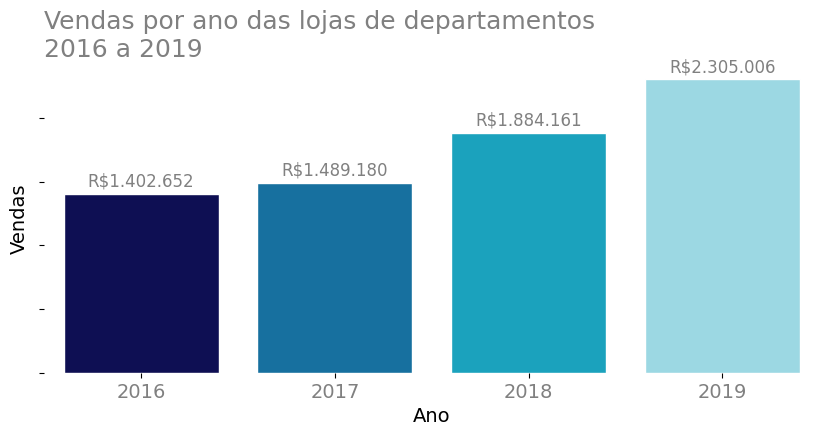

In [9]:
fig, ax=plt.subplots( figsize=(10,4))

sns.set_theme(style='white')
ax=sns.barplot(data=df_vendas_ano,x=df_vendas_ano.index,y='vendas',palette=cores)
ax.set_title('Vendas por ano das lojas de departamentos \n2016 a 2019',
             fontsize='18',loc='left',color='grey')
ax.set_ylabel('Vendas',fontsize='14')
ax.set_xlabel('Ano',fontsize='14')

#Aumentando a distância do eixo x
ax.xaxis.set_tick_params(labelsize=14,labelcolor='grey')

#Retirando as bordas
sns.despine(left=True,bottom=True)

ax.set_yticklabels([])

for i, valor in enumerate(df_vendas_ano['vendas']):
  qtd=f'R${valor:,.0f}'.replace(',','.')
  offset=1e5
  ax.text(i,valor+offset,qtd,fontsize=12,color='grey',ha='center',va='center')




<ipython-input-10-1ff11f7b0ccc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_vendas_ano,x=df_vendas_ano.index,y='vendas',palette=palette)


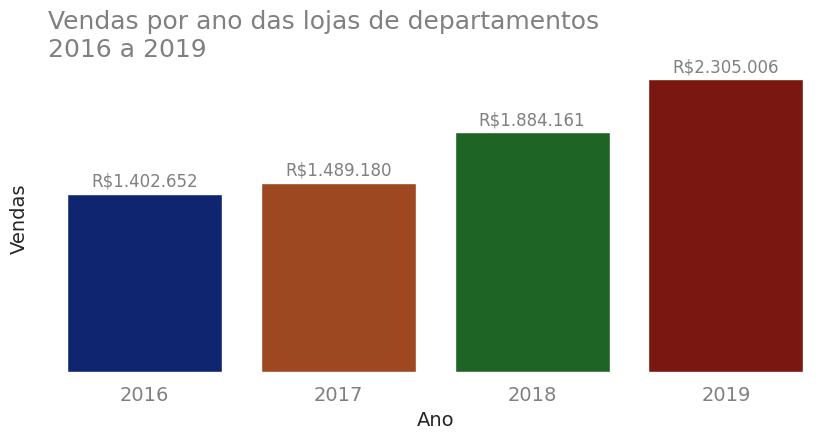

In [10]:
def grafico_vendas(palette):
  import matplotlib.pyplot as plt
  import seaborn as sns
  fig, ax=plt.subplots( figsize=(10,4))

  sns.set_theme(style='white')
  ax=sns.barplot(data=df_vendas_ano,x=df_vendas_ano.index,y='vendas',palette=palette)
  ax.set_title('Vendas por ano das lojas de departamentos \n2016 a 2019',
              fontsize='18',loc='left',color='grey')
  ax.set_ylabel('Vendas',fontsize='14')
  ax.set_xlabel('Ano',fontsize='14')

  #Aumentando a distância do eixo x
  ax.xaxis.set_tick_params(labelsize=14,labelcolor='grey')

  #Retirando as bordas
  sns.despine(left=True,bottom=True)
  #Retirando nomes do eixo y
  ax.set_yticklabels([])

  for i, valor in enumerate(df_vendas_ano['vendas']):
    qtd=f'R${valor:,.0f}'.replace(',','.')
    offset=1e5
    ax.text(i,valor+offset,qtd,fontsize=12,color='grey',ha='center',va='center')
  return ax


ax=grafico_vendas('dark')


***Conseguimos analisar a venda total por ano***

Potencializando a visualização do gráfico

<ipython-input-10-1ff11f7b0ccc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df_vendas_ano,x=df_vendas_ano.index,y='vendas',palette=palette)


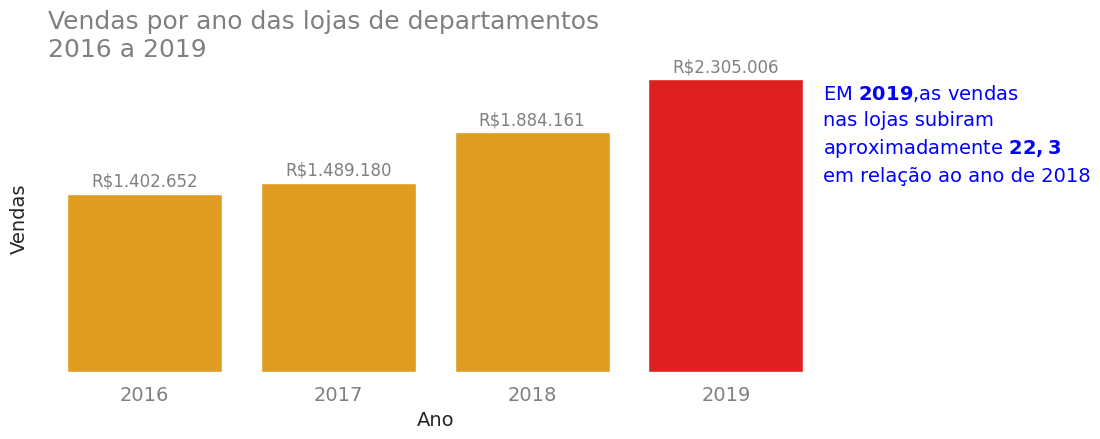

In [11]:
cores=[]
for ano in df_vendas_ano.index:
  if df_vendas_ano.loc[ano,'vendas']==df_vendas_ano.vendas.max():
    cores.append('red')
  else:
    cores.append('orange')
ax=grafico_vendas(cores)
ax.text(3.5,1.5e6, 'EM $\\bf{2019}$,as vendas\n''nas lojas subiram\n'
'aproximadamente $\\bf{22,3}$\n' 'em relação ao ano de 2018',
        fontsize=14,linespacing=1.45,color='blue')

fig=ax.get_figure()

**Vamos ver o top 7 produtos que mais apresenta lucros no catálogo**

In [12]:
top_lucro=vendas.copy()
top_lucro=top_lucro[['tipo_produto','lucro']]

top_lucro=top_lucro.groupby(['tipo_produto']).sum().sort_values('lucro',ascending=False)
top_7=top_lucro[:7]
top_7

,lucro
tipo_produto,
peças de reposição,91148.67
pneus,67460.05
ferramentas automotivas,63330.22
pesticidas,53343.89
ferramentas de jardinagem,53202.88
ferramentas,41020.34
vasos,33941.85


<ipython-input-13-087e2bc4595f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=top_7,x='lucro',y=top_7.index,palette=cores)


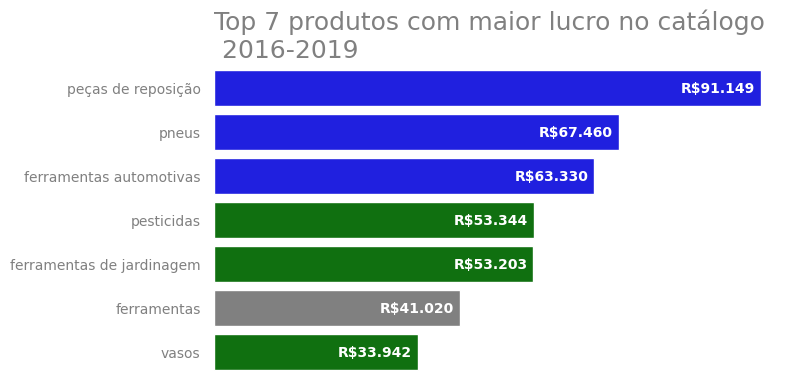

In [13]:
def grafico_top_7():
  import matplotlib.pyplot as plt
  import seaborn as sns

  fig, ax =plt.subplots(figsize=(10,4))
  fig.subplots_adjust(right=0.7)
  sns.set_theme(style='white')

  cores=['blue','blue','blue','green','green','grey','green']

  ax=sns.barplot(data=top_7,x='lucro',y=top_7.index,palette=cores)

  ax.set_title('Top 7 produtos com maior lucro no catálogo\n 2016-2019',fontsize=18,color='grey',loc='left')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=10,labelcolor='grey')
  sns.despine(left=True,bottom=True)

  for i,valor in enumerate(top_7['lucro']):
    qtd=f'R${valor:,.0f}'.replace(',','.')
    offset=1e3
    ax.text(valor-offset,i,qtd,fontsize=10,color='white',ha='right',va='center',fontweight='bold')
  return ax

ax=grafico_top_7()

In [14]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

<ipython-input-13-087e2bc4595f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=top_7,x='lucro',y=top_7.index,palette=cores)


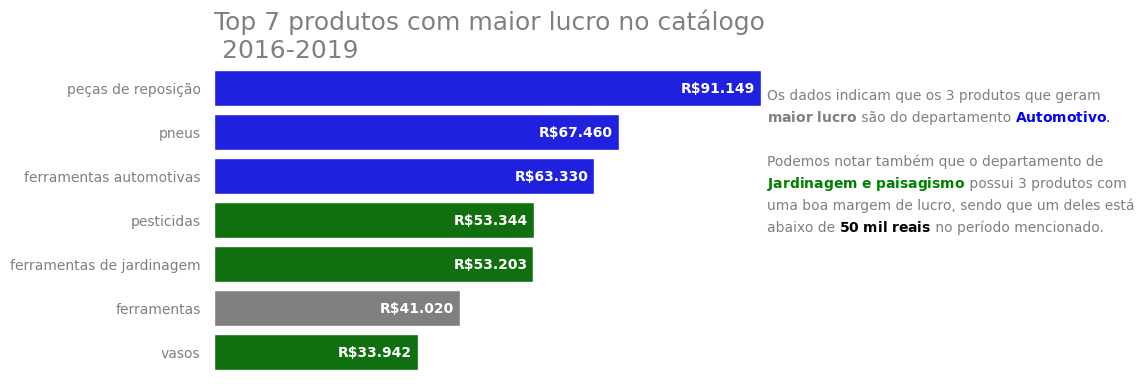

In [15]:
ax = grafico_top_7()

texto_colorido(
    9.2e4, 3.25,
    'Os dados indicam que os 3 produtos que geram\n'
    '$\\bf{maior\ lucro}$|| são do departamento ||$\\bf{Automotivo}$.\n'
    '\n'
    'Podemos notar também que o departamento de\n'
    '$\\bf{Jardinagem\ e\ paisagismo}$|| possui 3 produtos com\n'
    'uma boa margem de lucro, sendo que um deles está\n'
    'abaixo de ||$\\bf{50\ mil\ reais}$|| no período mencionado.',
    [['grey'],                       	           # linha 1
     ['grey', 'grey', 'blue'],         # linha 2
     ['grey'],                                     # linha 3
     ['grey'],                       	          # linha 4
     ['green', 'grey'],                   # linha 5
     ['grey'],                                    # linha 6
     ['grey', 'black', 'grey']        # linha 7
    ],
    esp=22,
    ax=ax,
    fontsize=10)

fig = ax.get_figure()

**Gráfico de colunas empilhadas**

In [16]:
df_vendas_reg=vendas.copy()
df_vendas_reg=df_vendas_reg[['data_pedido','regiao','vendas']]

df_vendas_reg['ano']=df_vendas_reg.data_pedido.dt.year
df_vendas_reg.drop(labels='data_pedido',axis=1,inplace=True)
df_vendas_reg

,regiao,vendas,ano
0,Sudeste,890.66,2018
1,Sudeste,2488.59,2018
2,Sudeste,49.72,2018
3,Sul,3255.75,2017
4,Sul,76.04,2017
...,...,...,...
8935,Sudeste,123.22,2018
8936,Nordeste,271.97,2019
8937,Nordeste,700.75,2019
8938,Nordeste,85.83,2016


Criando uma tabela cruzada com os valores de venda de cada ano por região

In [17]:
vendas_reg=pd.crosstab(index=df_vendas_reg.ano,columns=df_vendas_reg.regiao,
                       values=df_vendas_reg.vendas,aggfunc='sum')

vendas_reg=vendas_reg[['Sudeste','Nordeste','Centro-Oeste','Norte','Sul']]
vendas_reg

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
ano,,,,,
2016,739602.18,378521.83,121653.63,101580.57,61294.12
2017,803005.61,320804.28,149215.00,124164.47,91990.16
2018,1033836.21,401365.77,208068.71,108710.09,132180.63
2019,1146764.08,600738.87,257781.18,170311.34,129410.82


**Criando gráfico**

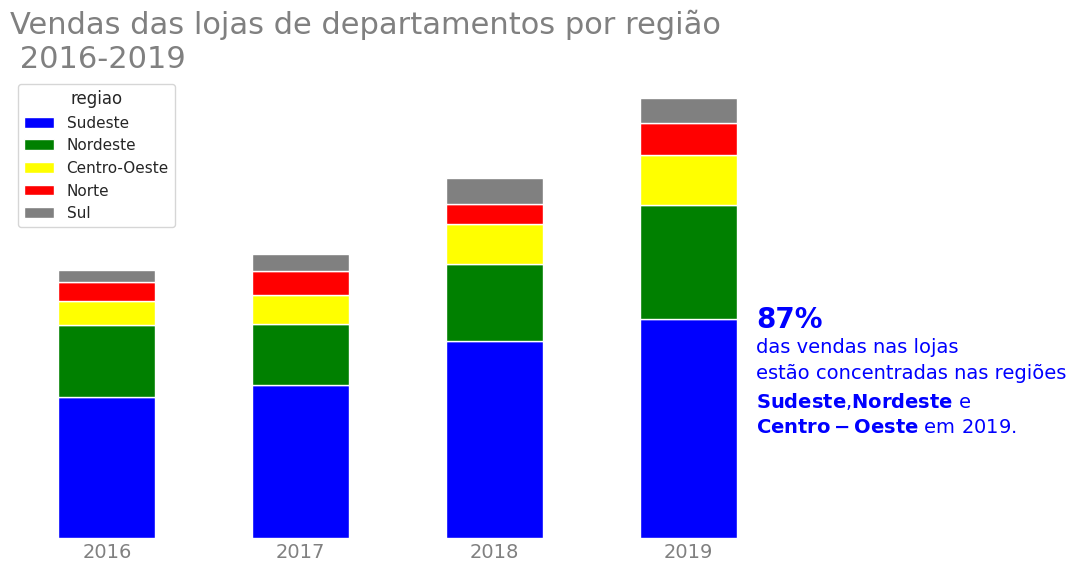

In [18]:
def grafico_vendas_regiao():
  cores=['blue','green','yellow','red','grey']

  ax=vendas_reg.plot(kind='bar',stacked=True,figsize=(10,6),color=cores)
  ax.set_title('Vendas das lojas de departamentos por região\n 2016-2019',fontsize=22,color='grey',loc='left')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.xaxis.set_tick_params(labelsize=14,labelcolor='grey',rotation=0)
  ax.set_frame_on(False)

  ax.tick_params(axis='both',which='both',length=0)

  ax.text(3.35,1.1e6,'87%',fontweight='bold',fontsize=20,color='blue')
  ax.text(3.35,5.5e5,'das vendas nas lojas\n'
  'estão concentradas nas regiões\n' '$\\bf{Sudeste}$,$\\bf{Nordeste}$ e\n'
  '$\\bf{Centro-Oeste}$ em 2019.',fontsize=14,
          linespacing=1.45,color='blue')

  return ax
ax=grafico_vendas_regiao()

Modificando o Bar label e legenda

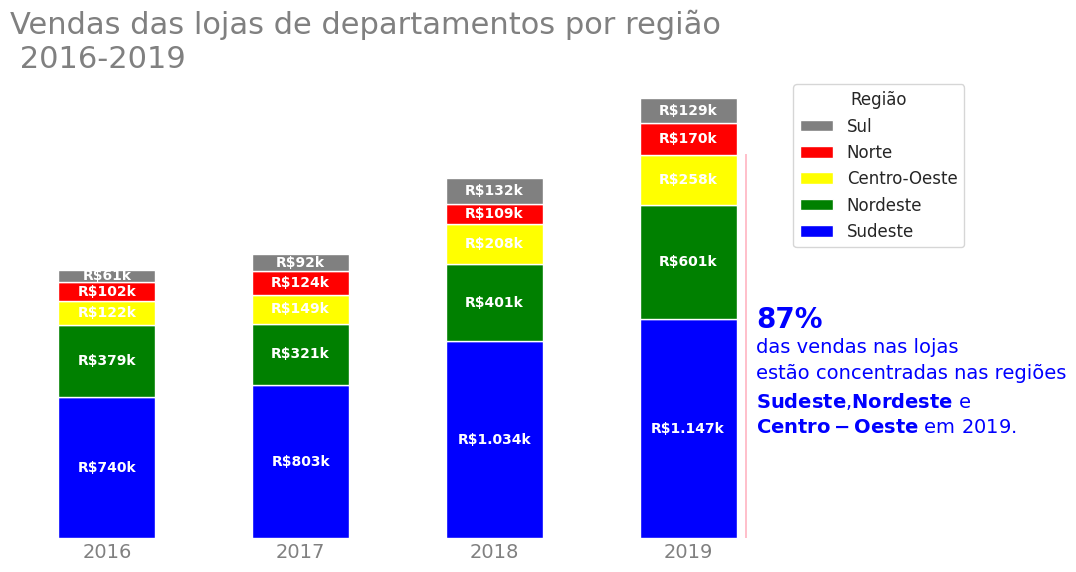

In [19]:
ax=grafico_vendas_regiao()

ax.legend(bbox_to_anchor=(1,1),reverse=True,title='Região',title_fontsize=12,fontsize=12)

#colocando valores com a função bar label que busca direto na coluna

for container in ax.containers:
  labels=[f'R${valor.get_height()/1000:,.0f}k'.replace(',','.') for valor in container]
  ax.bar_label(container,label_type='center',labels=labels,size=10,color='white',fontweight='bold')
  ax.axvline(x=3.3,ymin=0,ymax=0.83,color='pink',linewidth=1.2)

**Gráfico de barras empilhadas**

Qual o modo de envio mais utilizados pelos clientes da loja e se é mais proporcional para B2B ou B2C

In [20]:
df_envio=vendas.copy()
df_envio=df_envio[['modo_envio','segmento_cliente']]

df_envio_seg=pd.crosstab(index=df_envio.modo_envio,columns=df_envio.segmento_cliente).sort_values('B2B')
df_envio_seg

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,207,288
Envio rápido,676,673
Econômica,829,906
Entrega padrão,2552,2809


In [21]:
df_envio_normalizado=pd.crosstab(index=df_envio.modo_envio,columns=df_envio.segmento_cliente,normalize='index').sort_values('B2B')
df_envio_normalizado

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,0.418182,0.581818
Entrega padrão,0.476031,0.523969
Econômica,0.477810,0.522190
Envio rápido,0.501112,0.498888


Gerando o gráfico

In [22]:
# Função para escrita de texto utilizando diferentes cores. Não existe uma
# função nativa para isso. (Adaptado de https://github.com/empathy87/storytelling-with-data)
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

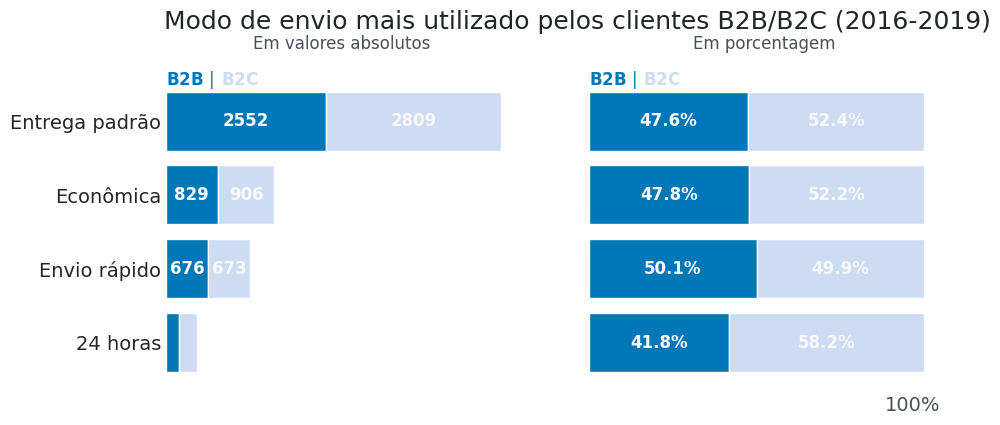

In [23]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10,4), sharey = True)
cores = [AZUL2, AZUL5]
axs[0].barh(df_envio_seg.index,df_envio_seg['B2B'],color=cores[0])
axs[0].barh(df_envio_seg.index,df_envio_seg['B2C'],left=df_envio_seg['B2B'],color=cores[1])
axs[0].set_title('Em valores absolutos\n', color = CINZA2)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_xticklabels([])
axs[0].yaxis.set_tick_params(labelsize=14, color = CINZA2)
axs[0].set_frame_on(False)

# remover todos os ticks do eixo x e y
axs[0].tick_params(axis='both', which='both', length=0)

texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores = [cores], ax=axs[0], fontsize=12) # legenda

axs[1].barh(df_envio_normalizado.index,df_envio_normalizado['B2B'],color=cores[0])
axs[1].barh(df_envio_normalizado.index,df_envio_normalizado['B2C'],left=df_envio_normalizado['B2B'],color=cores[1])
axs[1].set_title('Em porcentagem\n', color = CINZA2)
axs[1].set_xlabel('100%', color = CINZA2, size = 14, loc='right')
axs[1].set_ylabel('')
axs[1].set_xticklabels([])
axs[1].set_frame_on(False)


axs[1].tick_params(axis='both', which='both', length=0)

texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores = [cores], ax=axs[1], fontsize=12) # legenda

fig.suptitle("Modo de envio mais utilizado pelos clientes B2B/B2C (2016-2019)\n",
             fontsize=18, color=CINZA1, ha = 'right', x = 0.95, y = 1.05)

# Valores das barras
for container in axs[0].containers:
    labels = [str(valor.get_width()) if valor.get_width() > 300 else '' for valor in container]
    axs[0].bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

for container in axs[1].containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    axs[1].bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

fig.show()

**Vamos analisar o total de vendas pro trimestre do estado de São Paulo**

In [24]:
df_sp=vendas.copy()
df_sp=df_sp.query('estado=="São Paulo"')[['data_pedido','vendas']]

#Selecionar os dados por trimestre
df_sp.set_index('data_pedido',inplace=True)
df_sp=df_sp.resample('Q').agg('sum')

#dividindo vendas em milhares
df_sp['vendas']=round(df_sp['vendas']/1000,2)
df_sp.reset_index(inplace=True)
df_sp


<ipython-input-24-03a3942de5b3>:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_sp=df_sp.resample('Q').agg('sum')


,data_pedido,vendas
0,2016-03-31,41.87
1,2016-06-30,43.79
2,2016-09-30,154.91
3,2016-12-31,144.82
4,2017-03-31,36.13
5,2017-06-30,76.86
6,2017-09-30,129.76
7,2017-12-31,197.94
8,2018-03-31,44.26
9,2018-06-30,109.64


Gerando o gráfico

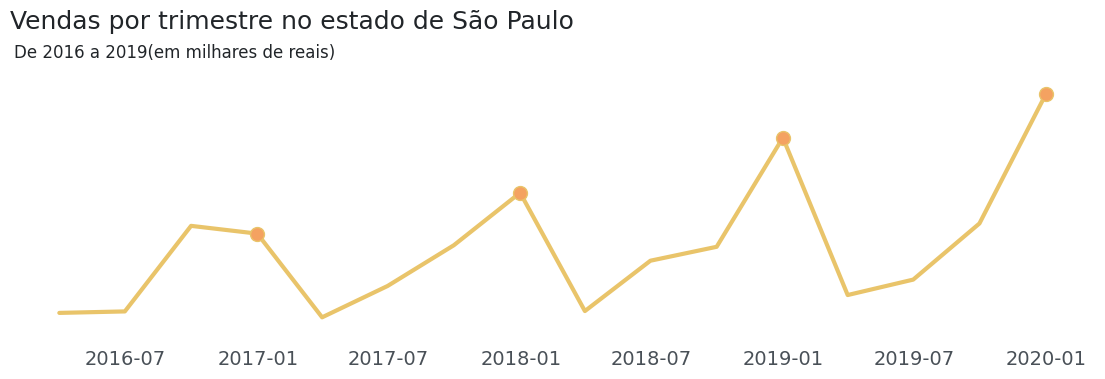

In [25]:
def grafico_vendas_sp_tri():
  import matplotlib.pyplot as plt

  fig, ax=plt.subplots(figsize=(14,4))

  pontos_marcar=[True if mes==12 else False for mes in df_sp['data_pedido'].dt.month]

  ax.plot(df_sp['data_pedido'],df_sp['vendas'],lw=3,color=AMARELO1,marker='o',
          markersize=10,markerfacecolor=LARANJA1,markevery=pontos_marcar)

  ax.set_title('Vendas por trimestre no estado de São Paulo',fontsize=18,color=CINZA1,loc='left')
  ax.text(0.3,0.95,'De 2016 a 2019(em milhares de reais)',transform=ax.transAxes,color=CINZA1,fontsize=12,ha='right',va='center')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.set_frame_on(False)
  ax.xaxis.set_tick_params(labelsize=14,labelcolor=CINZA2)

  ax.tick_params(axis='both',which='both',length=0)

  plt.ylim(0,400)
  return ax

ax=grafico_vendas_sp_tri()

Definindo intervalos de tempo

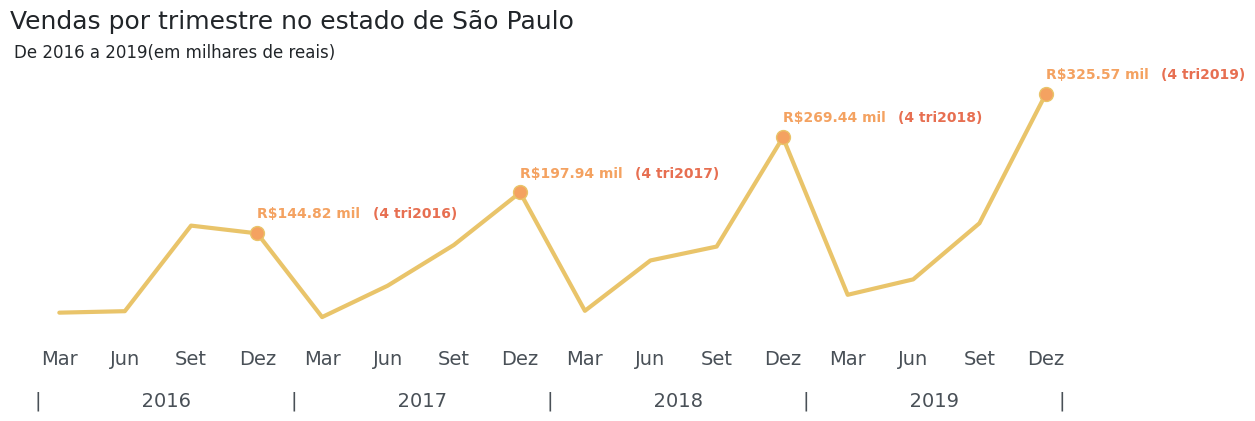

In [32]:
import matplotlib.dates as mdates

ax=grafico_vendas_sp_tri()
#localiza os meses
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

#Formata os meses
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
x_labels=['Mar','Jun','Set','Dez']*4
ax.set_xticks(df_sp['data_pedido'])
ax.set_xticklabels(x_labels,ha='center')

texto=[16*' '+str(i)+16*' ' for i in range(2016,2020)]
ax.text(ax.get_xbound()[0]+ 35,-80,f'|{texto[0]}|{texto[1]}|{texto[2]}|{texto[3]}|',fontsize=14,color=CINZA2)

ano=0
for i in range(3,len(df_sp['vendas']),4):
  ax.text(x=ax.get_xticks()[i],y=df_sp['vendas'][i]+20,s=f"R${df_sp['vendas'][i]} mil",color=LARANJA1,weight='bold',fontsize=10)
  ax.text(x=ax.get_xticks()[i]+160,y=df_sp['vendas'][i]+20,s=f'(4 tri{2016+ano})',color=VERMELHO1,weight='bold',fontsize=10)
  ano+=1

fig=ax.get_figure()

**Gráfico de linhas**

Qual faturamento por trimestre de cada região

In [38]:
df_regiao=vendas.copy()
df_regiao=df_regiao[['regiao','data_pedido','vendas']]
df_regiao=pd.crosstab(index=df_regiao.data_pedido,columns=df_regiao.regiao,values=df_regiao.vendas,aggfunc='sum')
df_regiao=df_regiao[['Sudeste','Nordeste','Centro-Oeste','Norte','Sul']]
df_regiao

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
data_pedido,,,,,
2016-01-04,55.92,NaN,NaN,NaN,NaN
2016-01-05,979.42,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,66.42,NaN,NaN
2016-01-07,14940.66,43.44,NaN,NaN,NaN
2016-01-08,296.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-12-27,NaN,2552.32,152.15,NaN,10.64
2019-12-28,603.96,NaN,NaN,NaN,NaN
2019-12-29,677.65,4079.73,NaN,456.94,NaN


In [40]:
df_regiao=df_regiao.resample('Q').agg('sum')
df_regiao=round(df_regiao/1e3,2)
df_regiao

<ipython-input-40-c72f249d2963>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_regiao=df_regiao.resample('Q').agg('sum')


regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
data_pedido,,,,,
2016-03-31,70.18,41.73,16.80,9.31,1.51
2016-06-30,122.72,87.41,30.83,24.68,10.62
2016-09-30,226.43,158.12,39.61,21.94,11.97
2016-12-31,320.27,91.27,34.41,45.65,37.19
2017-03-31,127.89,61.58,5.90,35.25,4.75
2017-06-30,161.54,54.93,16.96,13.35,21.23
2017-09-30,206.29,91.60,48.82,48.71,21.68
2017-12-31,307.28,112.69,77.54,26.86,44.34
2018-03-31,120.56,92.40,29.30,39.03,6.95


Gerando o gráfico

In [48]:
import plotly.express as px

fig=px.line(df_regiao,x=df_regiao.index,y=df_regiao.columns,markers=True,labels={'regiao':'Região'},
            color_discrete_sequence=[AZUL2, VERMELHO1, AMARELO1, VERDE1, CINZA3])

fig.update_layout(width=1300,height=600,font_family='DejaVu Sans',font_size=15,
                   font_color=CINZA2,title_font_color=CINZA1,title_font_size=24,
                   title_text='Faturamento da loja de departamentos por trimestre'+'<br><sup size=1 style="color:#555655">De 2016 a 2019</sup>',
                    xaxis_title='',yaxis_title='',plot_bgcolor=CINZA5)

fig.update_yaxes(tickprefix='R$',ticksuffix='mil')
labels=['T1<br>2016','T2<br>2016','T3<br>2016','T4<br>2016',
        'T1<br>2017','T2<br>2017','T3<br>2017','T4<br>2017',
        'T1<br>2018','T2<br>2018','T3<br>2018','T4<br>2018',
        'T1<br>2019','T2<br>2019','T3<br>2019','T4<br>2019']
fig.update_xaxes(ticktext=labels,tickvals=df_regiao.index)

fig.show()

Personalizando os textos informativos

In [54]:
fig.update_traces(mode='markers+lines',hovertemplate='<b>Período:</b> %{x} <br> <b>Faturamento:</b> %{y}')
fig.update_layout(hovermode='closest')

fig.update_layout(hovermode='x')
fig.update_layout(hovermode='x unified')